<a href="https://colab.research.google.com/github/gameaphiwat/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ

1. ข้อมูลโจทย์ อยู่ใน ตัวแปร Data
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.


กำหนดส่งวันที่       2    พฤษภาคม       2564     (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet:
 https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
Name = 'อภิวัฒน์  เหลี่ยมสิงขร'
ID = '6230205454'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:22


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-5.235210,-2.860860,-0.805871,-6.856979,-6.777006,-8.583028,7.259264,1.447058,-4.348699,-11.271009,3.188789,-3.706942,2.009193,1.570851,9.985383,2.633004,-0.269312,9.070029,7.393669,-8.279610,-7.588774,-0.331426,4.126808,0.896063,-6.202212,-2.145307,-9.459880,-6.749552,-7.682965,4.194720,-5.721721,22.973601
1,9.510645,-11.724693,-5.819783,-0.784435,4.213936,9.149353,7.801894,1.899180,-2.084421,-0.698642,6.422391,3.871113,4.632243,-0.403535,6.446859,5.793426,-5.205285,0.412460,5.175845,-9.418035,-9.259097,10.100478,7.104180,4.488556,7.110296,-5.801875,-8.563083,4.534392,-1.015977,6.009005,-23.449386,32.045023
2,9.768125,-9.505962,-5.533852,-1.030323,4.315569,10.896623,7.123481,2.266101,-1.416885,-2.166934,2.684397,4.669916,6.283261,-2.630425,10.382282,5.216370,-5.983786,1.917078,3.739032,-10.258786,-9.797286,9.477836,5.785408,4.343419,8.028847,-4.558729,-7.085180,3.283552,-0.202463,5.715904,-19.011924,30.579518
3,0.265184,-3.451455,-6.242929,11.222199,-1.053836,4.398465,-6.825062,4.595991,3.862471,4.729208,9.165959,6.151587,-0.823517,9.247155,-6.436628,3.884506,8.047165,2.184967,2.046106,8.087513,-1.901367,0.155482,-1.531668,5.135129,-8.600767,-7.648380,-7.757502,5.174454,-4.832281,2.099184,-6.902911,12.495921
4,-1.146704,-7.142143,1.101740,7.364864,-9.830379,-2.518818,-0.905386,-2.886974,-7.672461,-5.743728,9.156414,-5.083711,-11.229786,-1.163712,2.759683,-2.571018,8.121640,-4.834813,9.562179,-2.797196,7.536796,0.250696,-6.008766,-9.761062,8.361335,7.242344,4.432262,-1.469124,-1.062886,6.270803,-14.284285,33.354013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.468904,1.508715,-5.344932,-10.006272,4.791907,-0.434561,-2.514041,-0.196371,-5.284415,-3.984139,0.066370,3.120663,-3.187021,-1.873491,-4.708044,2.196728,-6.470265,2.258201,4.821559,-7.505703,3.943361,-2.060711,4.861821,6.092516,6.662436,1.913058,4.627481,2.277454,-2.579394,2.949088,3.017429,16.745438
9996,-3.648360,-10.778105,-4.391808,-9.771854,-2.643268,2.147130,-9.317066,-10.317206,1.935296,3.543057,-4.064741,-5.384925,1.282269,-1.254489,-7.606798,9.634642,9.467173,7.251492,-10.231833,-7.762669,-7.127021,1.845076,1.811317,5.178686,3.237937,6.232463,-8.661862,1.788290,4.374740,-4.792314,-21.556211,-21.961569
9997,8.435509,-6.554998,-8.754114,-4.359208,4.330762,-1.767436,-4.784996,-5.611044,8.741600,0.262239,7.516994,1.931891,-6.907949,8.729823,0.912568,-9.401059,0.683269,-4.586662,6.855340,-2.787098,-6.923734,9.168708,-6.908518,4.623331,5.178249,8.891360,-0.605690,-8.514347,-2.075814,-4.940532,-13.109996,-22.702661
9998,0.127080,4.501513,-3.334955,-3.516207,8.116519,-10.444870,-4.854239,-7.782008,-5.369580,3.583364,-7.395462,-1.538423,0.956582,-3.833582,-3.877565,2.837093,6.527495,-2.057050,-7.983029,6.432964,5.527862,-3.140381,1.553203,-0.265407,3.904482,-7.439079,-6.935518,8.433059,6.970092,-8.077428,9.003027,-38.387138


In [6]:
Data.shape#ดูขนาดของข้อมูล Data ก่อน

(10000, 32)

##**Import**

In [7]:
from sklearn.cluster import KMeans

##**Difine**

In [8]:
kmeans = KMeans(random_state=2021) 
#กำหนดค่า k ที่ต้องการ (ไม่จำเป็นต้องกำหนดก็ได้ เพราะkmeanมีdefult)
#random_state=2021 ให้ทุกคนเริ่มสุ่มที่จุดเดียวกัน จะได้มีการจัดกลุ่มเหมือนกัน

##**Fit- transform**
**คำนวณจุด cluter centers ของข้อมูล example_df_drop ด้วยวิธี K-means clustering**

In [9]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

##**แสดงจุด cluster centers ที่คำนวณออกมาได้**

In [10]:
kmeans.cluster_centers_

array([[  1.71800027,  -6.21285349,  -1.12774587,   1.08655163,
          3.37243952,   3.04625098,  -3.35065459,  -1.61455118,
         -1.58375089,   2.1162272 ,   1.92544718,   1.29159736,
          2.1771463 ,   5.25350631,  -3.67140014,  -1.66639205,
          0.91935109,  -0.25174973,  -2.21661717,  -1.53858595,
         -0.9981979 ,  -0.70473828,  -1.35106356,  -1.07321597,
          0.08594281,   2.64674883,  -1.47108795,  -3.77812246,
         -2.71070997,  -6.22198749, -12.42570697, -29.10993746],
       [ -2.22293057,  -2.71369564,  -5.30166516,   8.69970758,
          3.54064169,  -3.79352741,   2.12936095,   3.19350558,
          5.28987227,   1.83380424,  -1.63631266,   1.26693807,
          0.17474392,  -0.53366663,  -6.72321254,   0.3708422 ,
          2.41148277,  -0.08176501,   3.03063704,  -1.94128075,
          0.51915599,  -4.28269633,  -2.09922295,  -1.2644428 ,
         -0.48565122,  -3.59826376,  -4.7600181 ,   2.23730764,
          5.26170295,   2.61897293,  -5

In [11]:
#ทดสอบการจัดกลุ่มของ Data
y = kmeans.predict(Data)
y

array([2, 2, 2, ..., 0, 3, 1], dtype=int32)

**ทำ PCA ลด Dimention**

In [12]:
pca = PCA(n_components=2)

In [13]:
new_pca = pca.fit_transform(Data)

In [16]:
from matplotlib import pyplot as plt

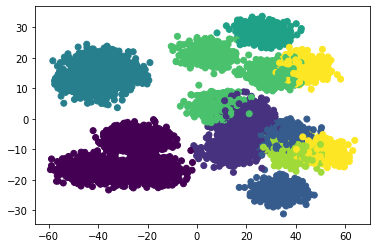

In [17]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

ทำการหาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่ม หรือทำการหาค่า k ที่เหมาะสมของ data

ใช้วิธีการหาค่า k ด้วยวิธี " The elbow method "

In [18]:
#เริ่มแรกทำการคำนวนค่า SSE ของ data
kmeans.inertia_ ##ค่าของ SSE Sum of Squared error

7230682.0301326085

In [19]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [20]:
SSE

[21383197.695221562,
 12526383.352083936,
 11134453.960132588,
 9906995.413663898,
 9144006.591083162,
 8391396.655424077,
 7801784.776167525,
 7230682.0301326085]

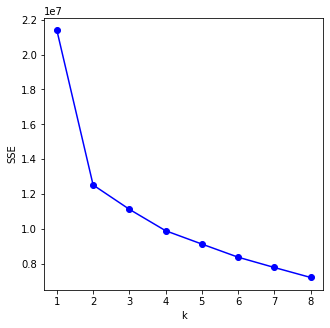

In [21]:
#ทำการนำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟจะบอกได้ว่า k มีทั้งหมด 4 กลุ่ม ดูจากจุดที่ k ที่ 4 เริ่มมีความแตกต่างของระยะห่างระหว่างจุดที่ใกล้กัน

ใช้วิธีการหาค่า k ด้วยวิธี " The silhouette coefficient "

###**The silhouette coefficient**

In [22]:
from sklearn import metrics

In [23]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

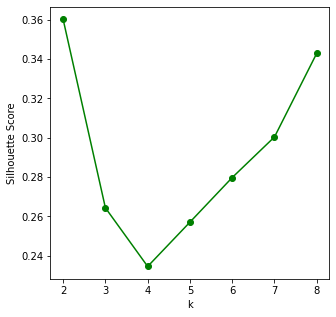

In [25]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

# จากกราฟที่ได้จะเห็นว่าข้อมูลแบ่งออกได้ 3 กลุ่ม

จากกราฟจะบอกได้ว่า k มีทั้งหมด 3 กลุ่ม ดูค่าได้โดยมีจุดที่มีระยะห่างแตกต่างกันใน 3 ช่วงที่ k เท่ากับ 2 , 3 และ 6

ลองนำค่า k ที่ได้มาแบ่งกลุ่มอีกครั้ง

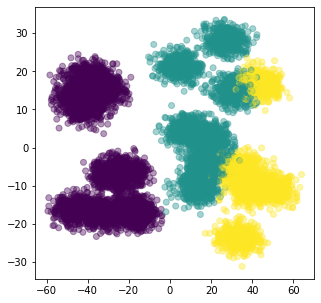

In [26]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.4)

# เมื่อกำหนดให้ค่า K = 3 ที่ได้จากการดูกราฟด้านบน ทำให้เห็นผลลัพธ์ของค่าข้อมูลที่ทับซ้อนกันจะมีสีเข้ม

จากกราฟจะเห้นได้ว่า เมื่อจัดกลุ่ม k ให้เท่ากับ 3 กลุ่มแล้ว จะมีข้อมูลบางจำนวนที่ทับซ้อนกัน และเห็นได้อีกว่าข้อมูลชุดนี้ปริมาณที่มาก

##**ลด Dimension ของข้อมูล**

In [32]:
corr = np.corrcoef(Data.to_numpy().T)

In [33]:
corr.shape

(32, 32)

In [34]:
corr

array([[ 1.        , -0.07709059, -0.03256027, ...,  0.20264864,
        -0.07709059,  0.20264864],
       [-0.07709059,  1.        ,  0.20168588, ...,  0.03084167,
         1.        ,  0.03084167],
       [-0.03256027,  0.20168588,  1.        , ..., -0.1431884 ,
         0.20168588, -0.1431884 ],
       ...,
       [ 0.20264864,  0.03084167, -0.1431884 , ...,  1.        ,
         0.03084167,  1.        ],
       [-0.07709059,  1.        ,  0.20168588, ...,  0.03084167,
         1.        ,  0.03084167],
       [ 0.20264864,  0.03084167, -0.1431884 , ...,  1.        ,
         0.03084167,  1.        ]])

In [35]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') 

            # สรุป จากการรันจะพบว่า ไม่มีข้อมูลใดที่มีความสัมพันธ์กัน หรือ มี Correlation = 1 เนื่องจากรันแล้วไม่มีการเกิดผลลัพธ์ใด ๆ ออกมา จึงทำให้ทราบว่าข้อมูลไม่มีความสัมพันธ์กัน

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0
